# Introduction
This is a case study of the Bellabeat company that serves as the capstone project for the **Google Data Analysis Career Certificate** utilizizing the preffered 6 step data analysis process: **ask, prepare, process, analyze, and act, to fullfill** and deliver the buisness tasks & objective. 

## Scenario Background
Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing stragety.

***

### Tools & Resources
* [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)
* Microsoft Excel
* SQL
* R
* Tableau

***

# STEP 1. ASK

#### Business Task:

```
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.
```


#### Business Objectives:  
1. What are the trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?



#### Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualizations and key findings
6. High-level content recommendations based on the analysis


#### Key Stakeholders:
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.


***

# STEP 2. PREPARE


#### Information on Data Source:
1. The data is publicly available on [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) and stored in 18 csv files. 
2. Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
3. 30 FitBit users who consented to the submission of personal tracker data.
4. Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

    
#### Limitations of Data Set:
1. Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
2. Sample size is low and not indicitive of the entire target demograpic population. 
3. As data is collected in a survey, we are limited in our ability to ascertain the integrity or accuracy of data.


#### Is Data ROCCC?

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.
1. Reliable - LOW - Low sample size of 30 correspondants
2. Original - LOW - Third party provider
3. Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
4. Current - LOW - Data is 5 years old
5. Cited - LOW - Data collected from third party, hence unknown

Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.


#### Data Selection:
The following file is selected and copied for analysis. 
    
 `dailyActivity_merged.csv`


***

# STEP 3. Process and STEP 4. Analyze

I will be using a cloud version of RStudio and BigQuery to process the dataset.
ults?
Key tasks
1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleanin
5. Perform calculations.
6. Identify trends and relationships.tion of data

#### Downloading and Uploading the Dataset:
First want to upload `dailyActivity_merged.csv` into BigQuery with and create a dataset and table with an appropriate naming convestion and schema. We also want to make sure the necessary packages are installed and functioning on R.

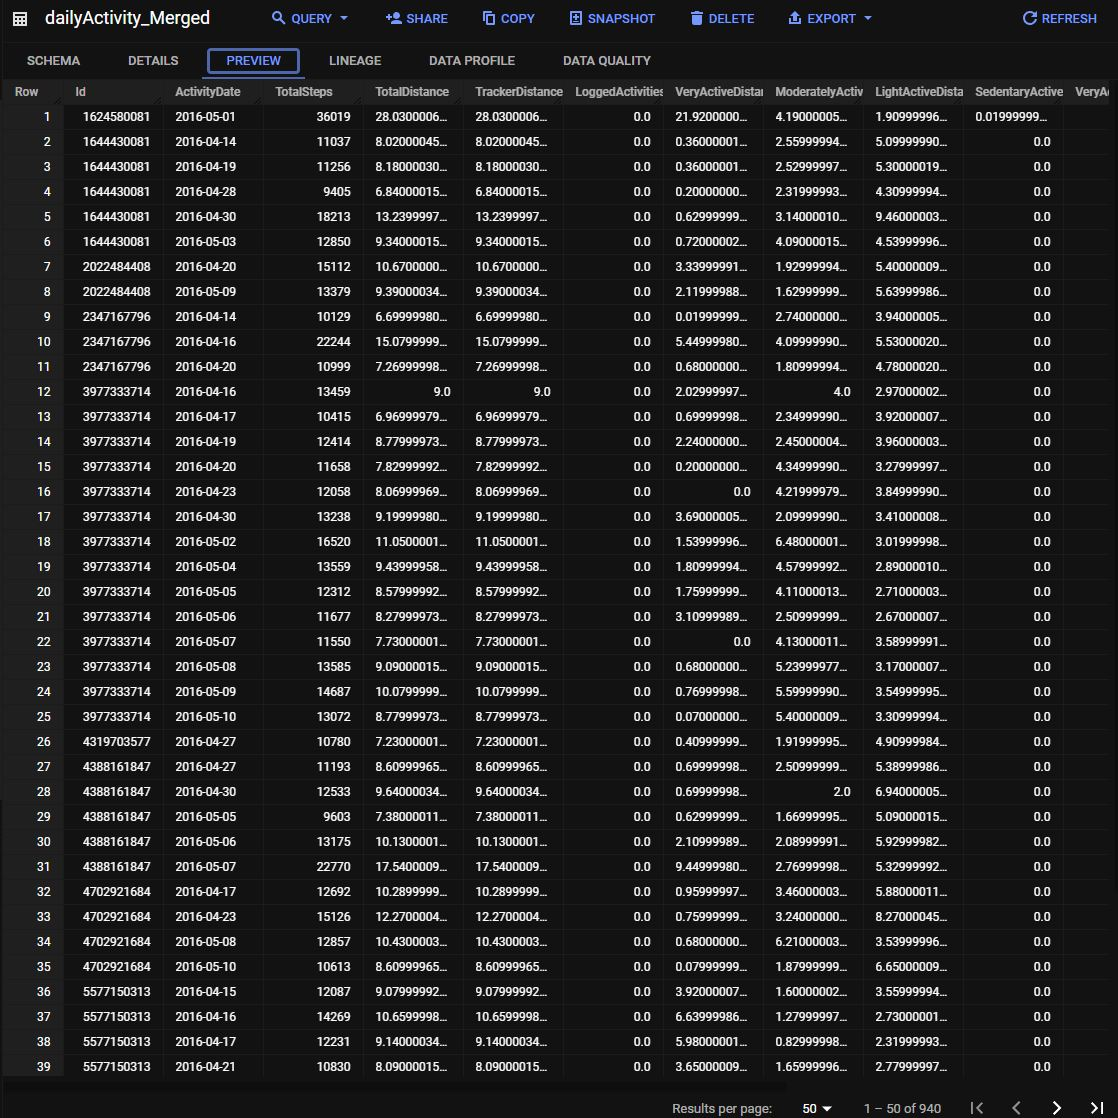

In [ ]:
#Installing the required packages
    install.packages(c("tidyverse", "lubridate", "readr", "ggplot2"))

In [1]:
#loading the required packages
    library(tidyverse)
    library(lubridate)
    library(readr)
    library(ggplot2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


We can preview the data and make sure it uploaded correctly using the head() function

In [3]:
dailyActivity_merged <- read.csv("C:...\\dailyActivity_merged.csv")
head(dailyActivity_merged)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


We can also run a quick null check for obvious missing data  

In [23]:
# Obtain the number of missing data points per column
missing_values_count <- colSums(is.na(dailyActivity_merged))

# Calculate the total number of data points per column
total_data_points_per_column <- nrow(dailyActivity_merged)  # This should be the number of rows in the data frame

# Calculate the percentage of missing data for each column
missing_data_percentage <- missing_values_count / total_data_points_per_column * 100

# Print the total missing data count and total data point count
cat("Total Missing Data Points:", sum(missing_values_count), "\n")
cat("Total Data Points:", nrow(dailyActivity_merged) * length(colnames(dailyActivity_merged)), "\n")
cat("Total Missing Data Percentage:", round(mean(missing_data_percentage), 2), "%\n")

# Iterate through the column names, missing values count, and missing data percentage
for (i in 1:length(colnames(dailyActivity_merged))) {
  # Print the column name, missing values count, and missing data percentage
  cat(colnames(dailyActivity_merged)[i], "\t", missing_values_count[i], "/", total_data_points_per_column, " (", round(missing_data_percentage[i], 2), "%)", "\n")
}

Total Missing Data Points: 0 
Total Data Points: 14100 
Total Missing Data Percentage: 0 %
Id 	 0 / 940  ( 0 %) 
ActivityDate 	 0 / 940  ( 0 %) 
TotalSteps 	 0 / 940  ( 0 %) 
TotalDistance 	 0 / 940  ( 0 %) 
TrackerDistance 	 0 / 940  ( 0 %) 
LoggedActivitiesDistance 	 0 / 940  ( 0 %) 
VeryActiveDistance 	 0 / 940  ( 0 %) 
ModeratelyActiveDistance 	 0 / 940  ( 0 %) 
LightActiveDistance 	 0 / 940  ( 0 %) 
SedentaryActiveDistance 	 0 / 940  ( 0 %) 
VeryActiveMinutes 	 0 / 940  ( 0 %) 
FairlyActiveMinutes 	 0 / 940  ( 0 %) 
LightlyActiveMinutes 	 0 / 940  ( 0 %) 
SedentaryMinutes 	 0 / 940  ( 0 %) 
Calories 	 0 / 940  ( 0 %) 


We will do the same for unique data and duplicates

In [28]:
# Get the unique values in column 1
unique_values <- unique(dailyActivity_merged[, 1])

# Print the number of duplicate rows and unique values
cat("Number of unique values:", length(unique_values), "\n")
cat("Unique values:", paste(unique_values, collapse = ", "), "\n")

Number of duplicate rows: 907 
Number of unique values: 33 
Unique values: 1503960366, 1624580081, 1644430081, 1844505072, 1927972279, 2022484408, 2026352035, 2320127002, 2347167796, 2873212765, 3372868164, 3977333714, 4020332650, 4057192912, 4319703577, 4388161847, 4445114986, 4558609924, 4702921684, 5553957443, 5577150313, 6117666160, 6290855005, 6775888955, 6962181067, 7007744171, 7086361926, 8053475328, 8253242879, 8378563200, 8583815059, 8792009665, 8877689391 


In [42]:
# Create a logical vector indicating duplicate groups
grouped_duplicates <- duplicated(dailyActivity_merged, fromLast = TRUE)

# Count the number of duplicate groups
number_of_duplicate_groups <- sum(grouped_duplicates)

# Get the unique groups of duplicate rows
unique_groups <- unique(dailyActivity_merged[grouped_duplicates, ], by.row = TRUE)

# Print the number of duplicate groups and unique groups
cat("\nUnique groups of duplicate rows:\n")
print(unique_groups)


Unique groups of duplicate rows:
 [1] Id                       ActivityDate             TotalSteps              
 [4] TotalDistance            TrackerDistance          LoggedActivitiesDistance
 [7] VeryActiveDistance       ModeratelyActiveDistance LightActiveDistance     
[10] SedentaryActiveDistance  VeryActiveMinutes        FairlyActiveMinutes     
[13] LightlyActiveMinutes     SedentaryMinutes         Calories                
<0 rows> (or 0-length row.names)


Now that we've gotten some insignt on the data as well as confirming that there isnt any missing datapoints, our next step is to transform the data so its more user
friendly for analysis. First I noticed the date column is in character format rather than a date format so we should convert that first for consistency before further analysis. BigQuery will sometimes do this automatically sometimes but ill save SQL for the analysis step and use coding to stay consistent for now.

In [54]:
# Load the dailyActivity_Merged data frame
dailyActivity_Merged <- read.csv("C:\\Users\\dfsbe\\Documents\\JupyterLab\\Resources\\Fitabase Data 4.12.16-5.12.16\\dailyActivity_merged.csv")

# Convert the dates in the ActivityDate column to datetime format, overwriting the original column
dailyActivity_Merged$ActivityDate <- as.POSIXct(dailyActivity_Merged$ActivityDate, format = "%m/%d/%Y", overwrite = TRUE)

# Print the first few rows of the dailyActivity_Merged data frame
head(dailyActivity_Merged)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


We should also create a column to specify the day of the week for each date as well as total active minutes to for ease of analysis.

In [63]:
# Load the dailyActivity_Merged data frame
dailyActivity_Merged <- read.csv("C:...\\dailyActivity_merged.csv")

# Convert the dates in the ActivityDate column to datetime format, overwriting the original column
dailyActivity_Merged$ActivityDate <- as.POSIXct(dailyActivity_Merged$ActivityDate, format = "%m/%d/%Y", overwrite = TRUE)

# Create a new column to store the day of the week values
dailyActivity_Merged$DayOfWeek <- weekdays(dailyActivity_Merged$ActivityDate)

# Print the first few rows of the dailyActivity_Merged data frame
head(dailyActivity_Merged)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


In [64]:
# Create a new column to store the total active minutes
dailyActivity_Merged$TotalActiveMinutes <- dailyActivity_Merged$VeryActiveMinutes + dailyActivity_Merged$FairlyActiveMinutes + dailyActivity_Merged$LightlyActiveMinutes

# Print the first few rows of the dailyActivity_Merged data frame
head(dailyActivity_Merged)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMinutes
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,366
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,257
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday,222
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,272
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,267
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,222


We'll now switch to SQL to do some basic analysis

Using the statement 
SELECT
  DayOfWeek,
  AVG(Calories) AS Average_Calories,
  AVG(TotalSteps) AS Average_TotalSteps,
  AVG(TotalDistance) AS Average_TotalDist
  AVG(TotalActiveMinutes) AS Average_TotalActiveMinutesance
dailyActivity_Merged_Transformederged
GROUP BY DayOfWeek
ORDER BY DayOfWeek;ed;ips.

![Image](http://localhost:8888/files/Resources/day%20of%20week%20average.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)

A quick look at the prompt shows the days DayOfWeek columns order is in alphabetical order rather than numeric, we should fix that quick with a case clause, 
something like,

In [ ]:
SELECT
  CASE
    WHEN DayOfWeek = 'Monday' THEN 1
    WHEN DayOfWeek = 'Tuesday' THEN 2
    WHEN DayOfWeek = 'Wednesday' THEN 3
    WHEN DayOfWeek = 'Thursday' THEN 4
    WHEN DayOfWeek = 'Friday' THEN 5
    WHEN DayOfWeek = 'Saturday' THEN 6
    ELSE 7
  END AS NumericDay,
  DayOfWeek,
  AVG(Calories) AS Average_Calories,
  STDEV(Calories) AS Standard_Deviation_Calories,
  AVG(TotalSteps) AS Average_TotalSteps,
  STDEV(TotalSteps) AS Standard_Deviation_TotalSteps,
  AVG(TotalDistance) AS Average_TotalDistance,
  STDEV(TotalDistance) AS Standard_Deviation_TotalDistance,
  AVG(TotalActiveMinutes) AS Average_TotalActiveMinutes,
  STDEV(TotalActiveMinutes) AS Standard_Deviation_TotalActiveMinutes
FROM dailyActivity_Merged_TransformedORDER BY NumericDay;
GROUP BY DayOfWeek

![Image](http://localhost:8888/files/Resources/day%20of%20week%202.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)	

This is a bit hard to read, partially because of the long decimals and low sample size for a more accurate and usable average and deviation. We can reformat the output by editing the clause as well as getting a percentile version of the standard deviation for better understanding with out limited sample size. something like,

In [ ]:
SELECT
  CASE
    WHEN DayOfWeek = 'Monday' THEN 1
    WHEN DayOfWeek = 'Tuesday' THEN 2
    WHEN DayOfWeek = 'Wednesday' THEN 3
    WHEN DayOfWeek = 'Thursday' THEN 4
    WHEN DayOfWeek = 'Friday' THEN 5
    WHEN DayOfWeek = 'Saturday' THEN 6
    ELSE 7
  END AS NumericDay,
  DayOfWeek,
  FORMAT(AVG(Calories), 'F2') AS Average_Calories,
  FORMAT(((STDEV(Calories) - AVG(Calories)) / AVG(Calories)) * 100, 'F2') AS Percentile_Difference_Calories,
  FORMAT(AVG(TotalSteps), 'F2') AS Average_TotalSteps,
  FORMAT(((STDEV(TotalSteps) - AVG(TotalSteps)) / AVG(TotalSteps)) * 100, 'F2') AS Percentile_Difference_TotalSteps,
  FORMAT(AVG(TotalDistance), 'F2') AS Average_TotalDistance,
  FORMAT(((STDEV(TotalDistance) - AVG(TotalDistance)) / AVG(TotalDistance)) * 100, 'F2') AS Percentile_Difference_TotalDistance,
  FORMAT(AVG(TotalActiveMinutes), 'F2') AS Average_TotalActiveMinutes,
  FORMAT(((STDEV(TotalActiveMinutes) - AVG(TotalActiveMinutes)) / AVG(TotalActiveMinutes)) * 100, 'F2') AS Percentile_Difference_TotalActiveMinutes
FROM dailyActivity_Merged_Transformed
GROUP BY DayOfWeek
ORDER BY NumericDay;

![Image](http://localhost:8888/files/Resources/Capture.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)	

From a quick glance we can see that for just about every catagory besides calories, there is a noticble drop in deviation from the average on weekends as
well as Thursday. We can make an inferece that due to the complexity of daily life, Individuals are more likely to have sporadic excercise routines during
the week and it may be necessary to analyze by hour rather than by day for a more thurough analysis. On weekends we see less of a deviation from the averages which is likely due to sedentary activity as rest days for many people with the most significant drop on Sunday. 

However Thursday also seems to be a day during the week in which physical activity is both high as well as less of a deviation from average, that raises
the question of whether its just a statistical anamoly from a low sample size or if individuals as a whole are generally more active on Thursdays. Although
with the limitations of the data set of only 33 female FitBit users who may or may not be from the same region with the same schedule it is not representitive of the entire population or female population without further data. That brings us to our next step.

# STEP 5. Share

Key tasks
1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.


We can save many of the outputs from calculations using R or SQL as individual datasets as well. I'll be uusing Tableau to generate some graphics insights
for better understanding. Such as the result generated by the previous SQL query.

![Image](http://localhost:8888/files/Resources/DeviationByDayGraph.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)

From this chart we can clearly see that the distance & steps for these individuals were relitevely similar in comparison to calories & activity which seems to vary significantly on an individual basis. Knowing that a value of 0 would mean no deviation from the average over all the days, We also can see 
that there are noticable drops in deviation on Saturday, Sunday and Thursday for all catagories with caloric deviation being affected the least.
We can also presume from the low deviation in distance and step count, it is likely that individuals are not necessarily walking/running as a main source of activity and calorie burn as everyone seems to get relitively the same ammount of distance and steps logged daily. 

![Image](http://localhost:8888/files/Resources/calvsacthigh.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)	
![Image](http://localhost:8888/files/Resources/by%20weekcalvsact.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)	

By comparison of high activity minutes which FitBit uses heartrate data as a qualifier we can see a high level of correlation between highly active minutes
and calories burned. From a day by day analysis with sleep minutes synchronized on the axis as well for comparison we can see that generally the entire sample pool stays within groupings. A day by day graphic also points out distinct indivduals that log a much higher than average level high activity day by day, with more joining in during the weekdays.

![Image](http://localhost:8888/files/Resources/distancecal.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)	

From a graphic made comparing distance to calories, we can confirm the lack of a correlation between distance logged and the ammount of calories burned,
the maximum calories burned logged is also not the highest distance logged and the maximum distance logged is not the highest calories burned.

![Image](http://localhost:8888/files/Resources/pieallmins.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)	![Image](http://localhost:8888/files/Resources/pienosleep.JPG?_xsrf=2%7Cb36b9a7d%7Cfb60d7b8915677708add19c57aebddb8%7C1699263522)	

A pie chart of the average day including sleep and one without.

# Key Insights

-   Users who have high very active minutes also expend more calories. High periods of activity does not neccessarily mean distance or step count but rather activities that increase heartrate.

-   There is no correlation stating that people who sleep more walk more. Users sleep patterns have no effect on the total steps taken daily or distance traveled.

-   Daily correlation increase during the weekends and deviate moreso during the working week.
-   The data provided for the heartrate_seconds_merged dataset was incomplete as only 14 users data was recorded. About 58% of the users in this dataset were not included.

# In Conclusion 
The provided data is not suitable for making reliable conclusions due to its limited scope and outdated nature. The company's global reach contrasts with the small sample size of 30 users, which is inadequate for drawing meaningful insights. Additionally, the data's age, originating from a one-month period in 2016, raises concerns about its relevance to current marketing strategies in 2022.

Furthermore, the data's lack of information on user gender poses a risk of inaccurate analysis and recommendations. Given that the analysis aims to inform marketing strategies for a smart device company targeting women, understanding the gender distribution of the user base is crucial for effective targeting and avoiding misleading conclusions.

# STEP 6. ACT

## Reccomendations
- Collect a larger and more representative sample of user data
- Gather more current and relevant data
- Include user gender information in data collection
- Explore alternative data sources prefrebly from within userbase
- Leverage predictive insights to personalize marketingnd predict future user behavior
